<a href="https://colab.research.google.com/github/tina60239/MarketWatchCat/blob/main/20250322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
dt.datetime.today(), dt.datetime.now() #取得當前時間

(datetime.datetime(2025, 3, 22, 9, 18, 11, 224854),
 datetime.datetime(2025, 3, 22, 9, 18, 11, 224853))

In [ ]:
dt.datetime.today() - dt.timedelta(days = 365) #今天往前計算一天

datetime.datetime(2024, 3, 22, 9, 22, 1, 834469)

In [ ]:
from dateutil.relativedelta import relativedelta
dt.datetime.today() - relativedelta(years = 2)

datetime.datetime(2023, 3, 22, 9, 24, 35, 58487)

In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta

base = dt.datetime.today() - relativedelta(years = 1, months = 6)
while base < dt.datetime.today():
    startdate = base.replace(day = 1).strftime("%Y/%m/%d") #取得當月第一天，並將日期時間轉字串
    endate = (base.replace(day = 1) +
             relativedelta(months = 1) -
             relativedelta(days = 1)).strftime("%Y/%m/%d") #取得當月最後一天，並將日期時間轉字串
    print(startdate, endate)
    base += relativedelta(months = 1) #以月為單位進行累加

2024/03/01 2024/03/31
2024/04/01 2024/04/30
2024/05/01 2024/05/31
2024/06/01 2024/06/30
2024/07/01 2024/07/31
2024/08/01 2024/08/31
2024/09/01 2024/09/30
2024/10/01 2024/10/31
2024/11/01 2024/11/30
2024/12/01 2024/12/31
2025/01/01 2025/01/31
2025/02/01 2025/02/28
2025/03/01 2025/03/31


In [ ]:
import requests
import pandas as pd
from io import StringIO
url = "https://www.taifex.com.tw/cht/3/pcRatio"
payload = {
    "down_type":"",
    "queryStartDate": "2025/02/20",
    "queryEndDate": "2025/03/22"
}
res = requests.get(url, params = payload)
df = pd.read_html(StringIO(res.text))
df[0]

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2025/3/21,228101,239479,95.25,115456,134595,85.78
1,2025/3/20,214674,210434,102.01,102246,106005,96.45
2,2025/3/19,548397,585988,93.59,54809,71186,76.99
3,2025/3/18,326381,296334,110.14,208530,218268,95.54
4,2025/3/17,300568,278745,107.83,182245,206835,88.11
5,2025/3/14,282606,264639,106.79,160315,193646,82.79
6,2025/3/13,298213,313239,95.20,143014,172573,82.87
7,2025/3/12,711488,631696,112.63,113153,122662,92.25
8,2025/3/11,432651,537746,80.46,173058,220271,78.57
9,2025/3/10,316492,348090,90.92,159939,195984,81.61


In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import requests
import pandas as pd
from io import StringIO

def pcratio(startdate, enddate):
    url = "https://www.taifex.com.tw/cht/3/pcRatio"
    payload = {
        "down_type":"",
        "queryStartDate": startdate,
        "queryEndDate": enddate
    }
    res = requests.get(url, params = payload)
    df = pd.read_html(StringIO(res.text))
    return df[0]

data = []
base = dt.datetime.today() - relativedelta(years = 1, months = 6)
while base < dt.datetime.today():
    startdate = base.replace(day = 1).strftime("%Y/%m/%d") #取得當月第一天，並將日期時間轉字串
    enddate = (base.replace(day = 1) +
             relativedelta(months = 1) -
             relativedelta(days = 1)).strftime("%Y/%m/%d") #取得當月最後一天，並將日期時間轉字串
    data.append(pcratio(startdate, enddate)) #收集每個月的表格資料
    print(startdate, enddate)
    base += relativedelta(months = 1) #以月為單位進行累加
df = pd.concat(data, ignore_index = True)
df

2023/09/01 2023/09/30
2023/10/01 2023/10/31
2023/11/01 2023/11/30
2023/12/01 2023/12/31
2024/01/01 2024/01/31
2024/02/01 2024/02/29
2024/03/01 2024/03/31
2024/04/01 2024/04/30
2024/05/01 2024/05/31
2024/06/01 2024/06/30
2024/07/01 2024/07/31
2024/08/01 2024/08/31
2024/09/01 2024/09/30
2024/10/01 2024/10/31
2024/11/01 2024/11/30
2024/12/01 2024/12/31
2025/01/01 2025/01/31
2025/02/01 2025/02/28
2025/03/01 2025/03/31


,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2023/9/28,283833,272022,104.34,166908,192291,86.80
1,2023/9/27,532947,505175,105.50,120829,147928,81.68
2,2023/9/26,421773,409734,102.94,230982,265937,86.86
3,2023/9/25,333852,271788,122.84,228459,228604,99.94
4,2023/9/22,289330,276500,104.64,189011,228409,82.75
...,...,...,...,...,...,...,...
369,2025/3/7,239535,262945,91.10,142853,168314,84.87
370,2025/3/6,191010,209440,91.20,129874,145241,89.42
371,2025/3/5,687941,623931,110.26,104393,107734,96.90
372,2025/3/4,521042,511949,101.78,177218,207752,85.30


In [ ]:
df['日期'] = pd.to_datetime(df['日期']) #將日期欄位內容從字串轉成日期時間
df = df.sort_values('日期').reset_index(drop = True) #對日期欄位進行遞增排序，並重設索引值
df

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2023-09-01,248350,239019,103.90,212099,208233,101.86
1,2023-09-04,350127,311603,112.36,242994,222804,109.06
2,2023-09-05,219787,194175,113.19,259908,240893,107.89
3,2023-09-06,436335,427740,102.01,166813,166136,100.41
4,2023-09-07,249520,252805,98.70,207695,213423,97.32
...,...,...,...,...,...,...,...
369,2025-03-17,300568,278745,107.83,182245,206835,88.11
370,2025-03-18,326381,296334,110.14,208530,218268,95.54
371,2025-03-19,548397,585988,93.59,54809,71186,76.99
372,2025-03-20,214674,210434,102.01,102246,106005,96.45


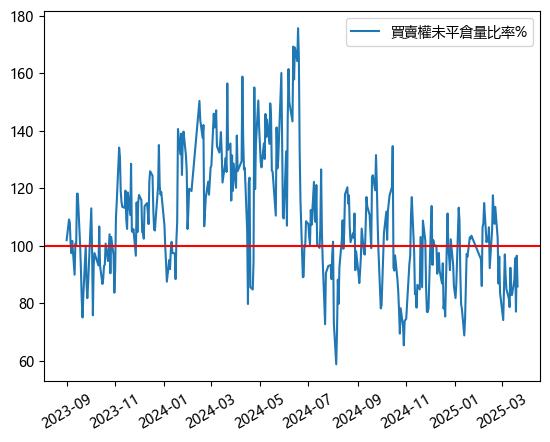

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Microsoft Yahei" #windows
#plt.rcParams['font.family'] = "Arial Unicode MS" #mac os
plt.plot(df['日期'], df['買賣權未平倉量比率%']) #繪製折線圖
plt.xticks(rotation = 30) #調整X軸刻度顯示的角度
plt.legend(['買賣權未平倉量比率%']) #設定圖例
plt.axhline(100, color = 'red') #設定水平線
#plt.axvline(100, color = 'red') #設定垂直線